In [36]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [37]:
#loading data
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

df = yf.download("TSLA", start="2015-01-01", end="2025-01-01", auto_adjust=False)

# Ensure clean columns
if isinstance(df.columns, pd.MultiIndex):
    df = df.droplevel(1, axis=1)

# Rename columns for consistency
df.columns = df.columns.str.replace(' ', '_')

print(df.head())
print(df.columns)




[*********************100%***********************]  1 of 1 completed

Price       Adj_Close      Close       High        Low       Open    Volume
Date                                                                       
2015-01-02  14.620667  14.620667  14.883333  14.217333  14.858000  71466000
2015-01-05  14.006000  14.006000  14.433333  13.810667  14.303333  80527500
2015-01-06  14.085333  14.085333  14.280000  13.614000  14.004000  93928500
2015-01-07  14.063333  14.063333  14.318667  13.985333  14.223333  44526000
2015-01-08  14.041333  14.041333  14.253333  14.000667  14.187333  51637500
Index(['Adj_Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')


In [38]:
print(df.columns)
df.info()
df.describe()
df.isnull().sum()
df.head()

Index(['Adj_Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2015-01-02 to 2024-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj_Close  2516 non-null   float64
 1   Close      2516 non-null   float64
 2   High       2516 non-null   float64
 3   Low        2516 non-null   float64
 4   Open       2516 non-null   float64
 5   Volume     2516 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


Price,Adj_Close,Close,High,Low,Open,Volume
Date,,,,,,
2015-01-02,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.041333,14.253333,14.000667,14.187333,51637500


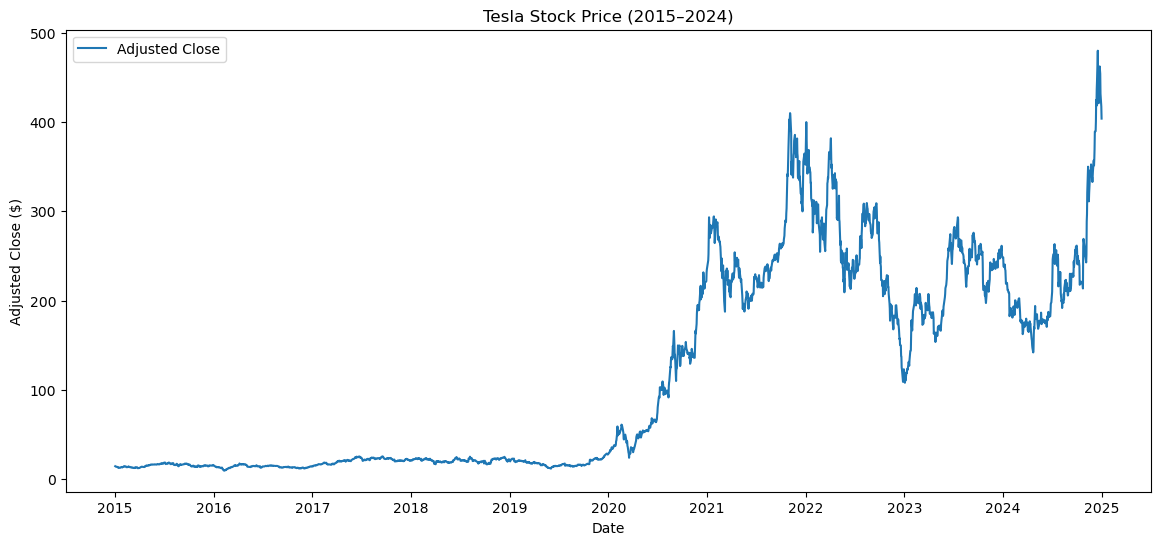

In [39]:
#how has stock price changed over time?
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Close'], label='Adjusted Close', color='tab:blue')
plt.title("Tesla Stock Price (2015–2024)")
plt.xlabel("Date")
plt.ylabel("Adjusted Close ($)")
plt.legend()
plt.show()


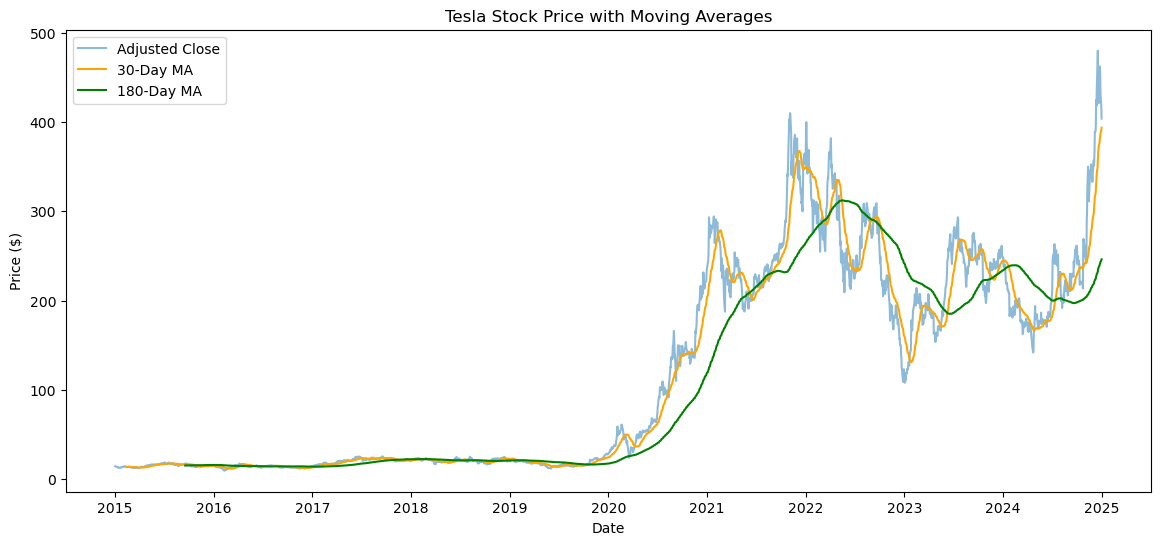

In [40]:
df['MA30'] = df['Close'].rolling(window=30).mean()
df['MA180'] = df['Close'].rolling(window=180).mean()

plt.figure(figsize=(14,6))
plt.plot(df.index, df['Close'], label='Adjusted Close', alpha=0.5)
plt.plot(df.index, df['MA30'], label='30-Day MA', color='orange')
plt.plot(df.index, df['MA180'], label='180-Day MA', color='green')
plt.title("Tesla Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

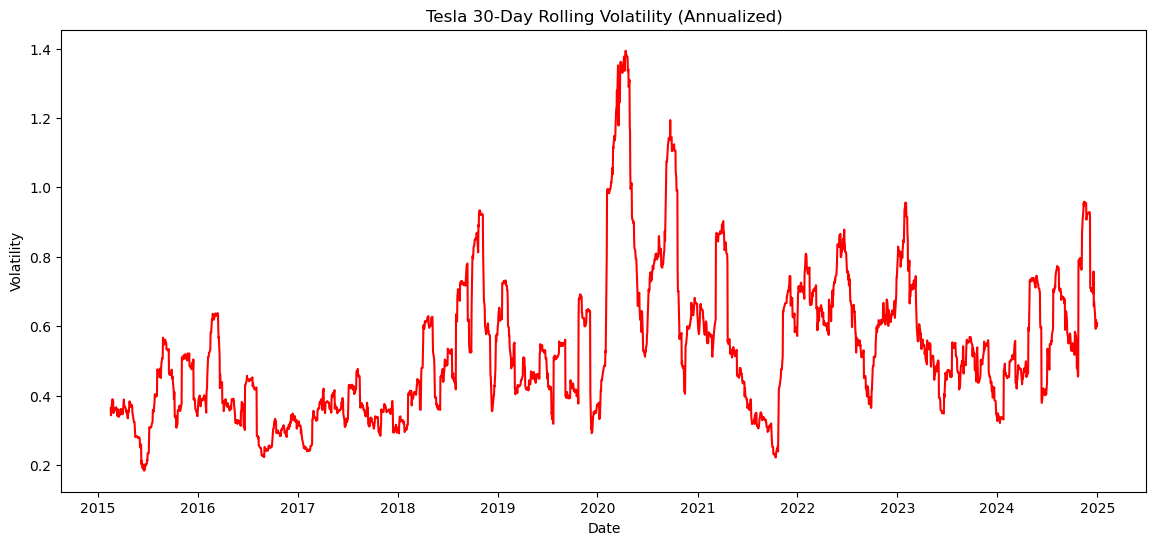

In [43]:
df['Rolling Volatility'] = df['Daily Return'].rolling(window=30).std() * (252**0.5)

plt.figure(figsize=(14,6))
plt.plot(df.index, df['Rolling Volatility'], color='red')
plt.title("Tesla 30-Day Rolling Volatility (Annualized)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()

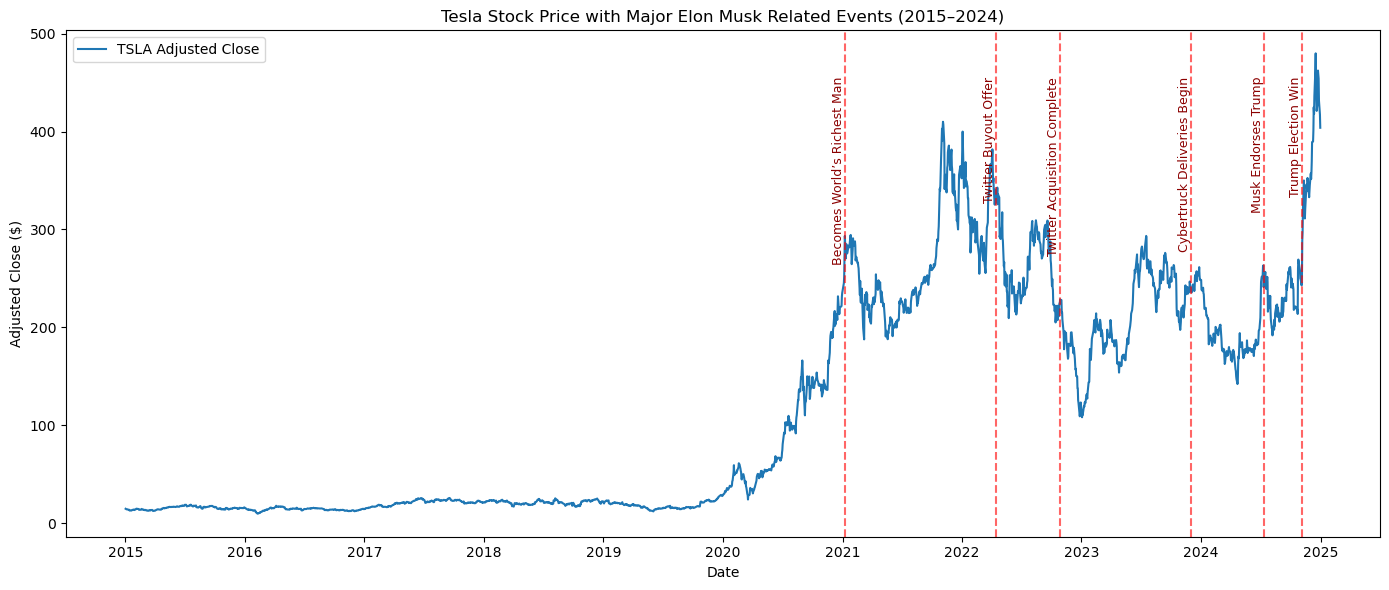

In [54]:
events = [
    ("2021-01-08", "Becomes World’s Richest Man"),
    ("2022-04-14", "Twitter Buyout Offer"),
    ("2022-10-27", "Twitter Acquisition Complete"),
    ("2023-12-01", "Cybertruck Deliveries Begin"),
    ("2024-07-13", "Musk Endorses Trump"),
    ("2024-11-04", "Trump Election Win")
]

plt.figure(figsize=(14,6))
plt.plot(df.index, df['Close'], color='tab:blue', label='TSLA Adjusted Close')

for date, label in events:
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', alpha=0.6)
    plt.text(pd.to_datetime(date), 
             df['Close'].max()*0.95,  # y-position near the top
             label, rotation=90, va='top', ha='right', fontsize=9, color='darkred')

plt.title("Tesla Stock Price with Major Elon Musk Related Events (2015–2024)")
plt.xlabel("Date")
plt.ylabel("Adjusted Close ($)")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print(df.columns)
df.info()
df.describe()
df.isnull().sum()
df.head()

Index(['Adj_Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2015-01-02 to 2024-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj_Close  2516 non-null   float64
 1   Close      2516 non-null   float64
 2   High       2516 non-null   float64
 3   Low        2516 non-null   float64
 4   Open       2516 non-null   float64
 5   Volume     2516 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


Price,Adj_Close,Close,High,Low,Open,Volume
Date,,,,,,
2015-01-02,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.041333,14.253333,14.000667,14.187333,51637500
